In [41]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [42]:
from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
Y = digits.target

print(type(X))

#NumpyのndarrayをPyTorchのTensorに変換
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

print(type(X))

#ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

#Adam
optimizer = optim.Adam(net.parameters())

#損失関数のログ 
losses = []

#100回のイテレーションを回す
for epoc in range(500):
    #前回のbackwardメソッドで
    #計算された勾配の値を削除
    optimizer.zero_grad()
    
    #線形モデルでyの予測値を計算
    y_pred = net(X)

    #MSE lossとwによる微分を計算
    loss = loss_fn(y_pred, Y)
    loss.backward()

    #勾配を更新する
    optimizer.step()

    #収束確認のためにlossを記録しておく
    losses.append(loss.item())

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [43]:
from torch.utils.data import TensorDataset, DataLoader

#Datasetを作成
ds = TensorDataset(X, Y)

#異なる順番で64個ずつデータを返すDataLoaderを作成
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

#最適化を実行
losses = []
for epoch in range(10):
    running_loss = 0.0
    for xx, yy in loader:
        #xx, yyは64個分のみ受け取れる
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)

In [44]:
#データを訓練用と検証用に分割
from sklearn.model_selection import train_test_split
#全体の30％は検証用
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

#層を積み重ねて深いニューラルネットワークを構築する
k = 100
net == nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
#訓練用データでDataLoaderを作成
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [45]:
train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    for i, (xx, yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / i)
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

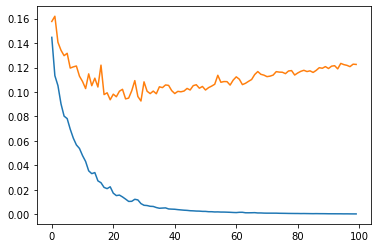

In [46]:
from matplotlib import pyplot as plt
plt.plot(train_losses)
plt.plot(test_losses)

In [47]:
#確率0.5でランダムに変数の次元を
#捨てるDropoutを各層に追加
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, 10)
)

In [48]:
optimizer = optim.Adam(net.parameters())

train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    #ネットワークを訓練モードにする
    net.train()
    for i, (xx, yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / i)
    #ネットワークを評価モードにして
    #検証データの損失関数を計算する
    net.eval()
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

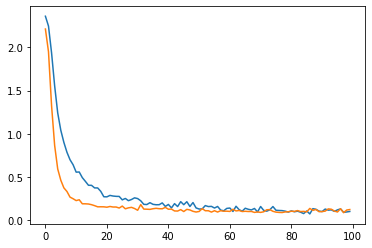

In [49]:
from matplotlib import pyplot as plt
plt.plot(train_losses)
plt.plot(test_losses)

In [54]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
    
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return X

mlp = nn.Sequential(
    CustomLinear(64, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 200),
    nn.Linear(200, 10)
)